### scikit-learn中的PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [6]:
X_train.shape

(1347, 64)

In [30]:
%%time 

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 8.3 ms


KNeighborsClassifier()

In [8]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [27]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 9.32 ms


KNeighborsClassifier()

In [17]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

In [19]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [20]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

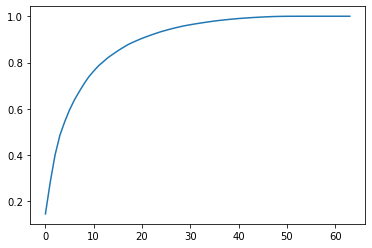

In [22]:
plt.plot([i for i in range(X_train.shape[1])],
            [np.sum(pca.explained_variance_ratio_[:i+1])for i in range(X_train.shape[1])])
plt.show()

In [23]:
pca = PCA(0.95) #输入小于1的值表示要保留多少信息
pca.fit(X_train)

PCA(n_components=0.95)

In [33]:
pca.n_components_

28

In [34]:
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [35]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 3.32 ms


KNeighborsClassifier()

In [37]:
knn_clf.score(X_test_reduction, y_test)

0.98

### 降维到2维的意义：可视化

In [39]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_reduction = pca.transform(X)

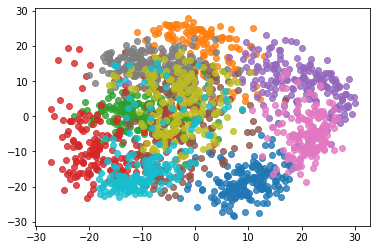

In [40]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha = 0.8)
plt.show()